# Sesión de ejercicios 10

El objetivo de esta sesión de ejercicios es que el estudiante logre manejar de forma correcta la funcionalidad encapsulada en el paquete `Pandas` para manejo de datos.

Pandas provee funcionalidades para encapsular distintos tipos de datos ordenados a través de índices y columnas. Esta funcionalidad permite el correcto manejo de dicha información, además de la ejecución de consultas, filtros, agrupamientos, etc. con muy pocas líneas de código.  Adicionalmente, `Pandas` permite el manejo de información organizada como series de tiempo.

Ejecutar el siguiente código para importar las librerías necesarias para esta sesión.  Si necesita alguna librería extra, importarla en el ejercicio correspondiente.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
sns.set()

## Ejercicio 1

El índice global de felicidad es una publicación anual de las Naciones Unidas que mide la felicidad en 157 países, basándose en diversos factores, como el PIB per cápita. Se requiere conocer la situación de Ecuador con respecto al resto de países del mundo. Para ello:

- Leer en un `DataFrame` los datos del archivo `felicidad-2016.csv`
- una vez haya leído el archivo, muestre las columnas del `DataFrame` y los primeros 10 registros (para ello use la función `.head()`)
- Muestre cuál es `Happiness Score` de Ecuador y el score promedio del resto de los países. Ecuador está por sobre la media o por debajo?

P.D. como ayuda, use el campo `Country` como índice del `DataFrame`

In [309]:
# Ingrese su código aquí

ds = pd.read_csv("felicidad-2016.csv", index_col=0, sep=",")

# se muestran las columnas y los primeros registros
print(ds.columns)
print(ds.head())

print("El Happiness Score de Ecuador es {:f}".format(ds.loc["Ecuador", "Happiness Score"]))
print("El Happiness Score (promedio) del mundo es {:f}".format(ds.loc[:, "Happiness Score"].mean()))

Index(['Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')
                     Region  Happiness Rank  Happiness Score  \
Country                                                        
Denmark      Western Europe               1            7.526   
Switzerland  Western Europe               2            7.509   
Iceland      Western Europe               3            7.501   
Norway       Western Europe               4            7.498   
Finland      Western Europe               5            7.413   

             Lower Confidence Interval  Upper Confidence Interval  \
Country                                                             
Denmark                          7.460                      7.592   
Switzerland                      7.4

## Ejercicio 2

Usando como base el ejercicio anterior, ¿Cuales son los 3 primeros países en términos de `Happiness Score`?; y, ¿Cuáles son los 3 países con menor Score?. Muestre en una tabla: El País, el Score, el `Health (Life Expectancy)`, y la `Region`

In [310]:
# Ingrese su código aquí

# se ordenan los datos por el score de la felicidad
tmp = ds.sort_values(by="Happiness Score")

# se concatenan los 3 primeros y últimos registros y se muestran los resultados
pd.concat([
    tmp.iloc[:3, ][["Happiness Score", "Health (Life Expectancy)", "Region"]], 
    tmp.iloc[-3:, ][["Happiness Score", "Health (Life Expectancy)", "Region"]]
])

,Happiness Score,Health (Life Expectancy),Region
Country,,,
Burundi,2.905,0.15747,Sub-Saharan Africa
Syria,3.069,0.62994,Middle East and Northern Africa
Togo,3.303,0.24811,Sub-Saharan Africa
Iceland,7.501,0.86733,Western Europe
Switzerland,7.509,0.86303,Western Europe
Denmark,7.526,0.79504,Western Europe


## Ejercicio 3

Generar un reporte donde se muestren los `Happiness Score` promedios por Región. Dichos valores deberán estar ordenados de menor a mayor.

Salida esperada:

<img src="ejercicio3.png">

In [311]:
# Inserte su código aquí

# se agrupan los registros por region, se calcula su media y se ordenan los valores
tmp = ds.groupby("Region")["Happiness Score"].mean().sort_values()

# se muestra la tabla con los resultados
print("{:40s}{:20s}".format("Region", "Score"))
print("-"*70)
for r in tmp.index:
    print("{:40s}{:20.3f}".format(r, tmp[r]))
print("-"*70)

Region                                  Score               
----------------------------------------------------------------------
Sub-Saharan Africa                                     4.136
Southern Asia                                          4.563
Southeastern Asia                                      5.339
Central and Eastern Europe                             5.371
Middle East and Northern Africa                        5.386
Eastern Asia                                           5.624
Latin America and Caribbean                            6.102
Western Europe                                         6.686
North America                                          7.254
Australia and New Zealand                              7.323
----------------------------------------------------------------------


## Ejercicio 4

Se requiere mostrar la información del dataset `felicidad-2016.csv`, pero únicamente de ciertos países. Para ello, realizar lo siguiente:

- Pedir un listado de países al usuario (ingresar paises separados por comas)
- Verificar si los países existen en el `DataFrame`. Si algún país no existe, descartarlo
- Mostrar toda la información disponible de los países ingresados

In [95]:
#  Ingrese su código aquí

buscar = input("Ingreses países separados por comas: ").split(",")

# se verificar que los paises existen. Si alguno no existe, se lo elimina
for b in buscar:
    if b not in np.array(ds.index):
        buscar.remove(b)

# se extraen los paises del estudio
paises = np.array(ds.index)

# se crea una funcion q verifica que un pais se encuentre en la lista de paises pedidos
f = lambda p: p in buscar

# se filtran, a manera de una máscara, los paises pedidos
ds.loc[map(f, paises)]

Ingreses países separados por comas: Ecuador,Peru,abc,Colombia


,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,,,,
Colombia,Latin America and Caribbean,31,6.481,6.384,6.578,1.03032,1.02169,0.59659,0.44735,0.05399,0.15626,3.17471
Ecuador,Latin America and Caribbean,51,5.976,5.880,6.072,0.97306,0.85974,0.68613,0.40270,0.18037,0.10074,2.77366
Peru,Latin America and Caribbean,64,5.743,5.647,5.839,0.99602,0.81255,0.62994,0.37502,0.05292,0.14527,2.73117


## Ejercicio 5

La función `np.unique()` del paquete `numpy` retorna los elementos únicos de una lista o array. Esta funcionalidad es muy útil en casos en donde se requiera saber que valores puede tener una variable. Adicionalmente, cuando se manejan elementos de tipo `Date` en pandas, muchas veces se tienen frecuencias menores a un día (varias mediciones por día). Para conocer cuantos días existen en un dataset, se puede ejecutar el siguiente comando:

`np.unique(ds.index.date).size`

considerando que `ds` es un `DataFrame` que tiene un índice de tipo `Date` (como en el ejercicio anterior)

El archivo `weather_2012.csv` contiene información ambiental en un lugar específico. Entre otras cosas tiene la temperatura (Temp), humedad relativa (Rel_Hum), velocidad del viento (Wind_Spd), visibilidad (Visibility), tipo de clima (Weather).  

Una compañia dedicada a la salud y cuidado del hogar está realizando un estudio de la situación actual de la región de estudio. Esta compañia busca determinar cuan problemático podría llegar a ser la humedad relativa en la salud de las personas. Para ello, determina que necesita conocer cuantos días existieron en donde la humedad relativa estuvo fuera del rango de 15% -75%.  Implemente esta funcionalidad y muestre la cantidad de días en donde existieron valores de humedad relativa fuera de este rango y muestre el número total de días que existen en el `DataFrame`. Finalmente, calcule el porcentaje de días que estuvieron fuera del rango antes descrito.

In [312]:
# Ingrese su código aquí

ds = pd.read_csv("weather_2012.csv", index_col=0, parse_dates=["Date/Time"])

# se determina el número de días donde los valores de humedad estuvieron fuera del rango
n_fuera = np.unique(ds.loc[(ds["Rel_Hum"]<15) | (ds["Rel_Hum"]>75)].index.date).size
print("Número de días fuera del rango: {:d}".format(n_fuera))

# se determina el número de días totales en el dataframe
n = np.unique(ds.index.date).size
print("Número total de días en el DataFrame: {:d}".format(n))

# se calcula el porcentaje de días fuera de rango
print("Porcentaje de días fuera del rango {:.1f}%". format(100*n_fuera/n))

Número de días fuera del rango: 288
Número total de días en el DataFrame: 366
Porcentaje de días fuera del rango 78.7%


## Ejercicio 6

En el `DataFrame` anterior, existe una columna denominada `Weather` con múltiples valores. Una empresa está interesada en la relación entre visibilidad y clima cuando hay neblina (Fog). Calcule, en términos porcentuales cuanta visibilidad se pierde en días en los que hay neblina. Adicionalmente, cuál es el porcentaje de días en donde se tiene neblina.

Ayuda: <br>
- Investigue como buscar un substring en una columna. Busque los elementos que tengan *Fog* en la columna `Visibility`

In [140]:
# Inserte su código aquí

# promedio de visibilidad cuando hay neblina
v_fog = ds.loc[ds["Weather"].str.contains("Fog")]["Visibility"].mean()

# promedio de visibilidad cuando no hay neblina
v_normal = ds.loc[~ds["Weather"].str.contains("Fog")]["Visibility"].mean()

print("Porcentaje de visibilidad cuando hay neblina: {:.2f}%".format(v_fog*100/v_normal))

# número de días donde hay neblina
n_dias_fog = np.unique(ds.loc[ds["Weather"].str.contains("Fog")]["Visibility"].index.date).size

# número de días totales en el dataset
n_dias = np.unique(ds.index.date).size

print("Porcentaje de días donde hay neblina: {:.2f}%".format(n_dias_fog*100/n_dias))

Porcentaje de visibilidad cuando hay neblina: 20.94%
Porcentaje de días donde hay neblina: 21.31%


## Ejercicio 7

Usando el `DataFrame` anterior, se requiere categorizar las temperaturas encontradas. Para ello, se definen las siguientes categorías para la temperatura ($t$):

- Categoria 1: $t \le 0$
- Categoria 2: $0 < t \le 10$
- Categoria 3: $10 < t \le 20$
- Categoría 4: $t > 20$

Para este ejercicio, cree una nueva columna `Categoria` cuyos valores dependan de los rangos de temperatura. Finalmente muestre el promedio de temperatura por categoría.

In [154]:
# Inserte su código aquí

def dar_categoria(t):
    """Retorna la categoría en base a la temperatura `t` de entrada
    
    Parametros
    ----------
    t : float
      temperatura medida
    """
    cat = 4
    if t <=0:
        cat = 1
    elif t <=10:
        cat = 2
    elif t <= 20:
        cat = 3

    return "Categoria " + str(cat)

# se crea una nueva columna con las categorias creadas de la función
ds["Categoria"] = list(map(dar_categoria, ds["Temp"]))

# se muestran los resultados
print(ds.groupby("Categoria").mean()["Temp"])

Categoria
Categoria 1    -6.636310
Categoria 2     4.459402
Categoria 3    15.257582
Categoria 4    24.078036
Name: Temp, dtype: float64


## Ejercicio 8

El archivo `power_consumption.csv` contiene mediciones de consumo de potencia en una casa. Estas mediciones tiene una frecuencia de 1 minuto y sus columnas se describen a continuación:

- DateTime: Index information
- global_active_power: The total active power consumed by the household (kilowatts).
- global_reactive_power: The total reactive power consumed by the household (kilowatts).
- voltage: Average voltage (volts).
- global_intensity: Average current intensity (amps).
- sub_metering_1: Active energy for kitchen (watt-hours of active energy).
- sub_metering_2: Active energy for laundry (watt-hours of active energy).
- sub_metering_3: Active energy for climate control systems (watt-hours of active energy).

Se requiere analizar los valores máximos de consumo del hogar en lapsos de tiempo de 15 minutos, en vez de 1 minuto. Entonces, el `DataFrame` deberá ser re-sampleado a una frecuencia de 15 minutos. Adicionalmente, se requieren encontrar los outliers (valores anómalos) en términos de potencia activa y reactiva. Para ello, un valor de potencia activa se considera anómalo si sobrepasa los 4 kwh. Así mismo, un valor de potencia reactiva se considera anómalo si sobrepasa los 0.5 kwh.

Genere tres `DataFrames`: (1) con la información original re-sampleada a 15 minutos, tomando en cuenta los valores máximos; (2) con los outliers de potencia activa; y, (3) con los outliers de potencia reactiva.

Ejecute la función `mostrar_potencia(d, dogap, dogrp)` mandando como parámetros, los tres dataframes formados anteriormente.

Finalmente, mostrar las fechas en las que estos outliers sucedieron.

Fechas en las que existen outliers de consumo de potencia activa: 
2007-02-02 06:30:00
2007-02-02 22:30:00
2007-02-02 22:45:00
2007-02-02 23:00:00
Fechas en las que existen outliers de consumo de potencia reactiva: 
2007-02-01 17:15:00
2007-02-01 17:30:00
2007-02-01 18:00:00
2007-02-01 18:15:00
2007-02-01 19:45:00
2007-02-01 20:00:00


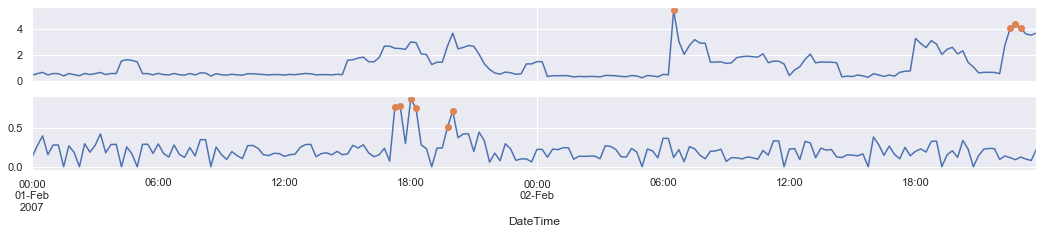

In [262]:
def mostrar_potencia(d, dogap, dogrp):
    """Muestra información de temperatura y humedad del DataFrame `d`
    
    Parametros
    ----------
    d: DataFrame
      DataFrame con la información de potencia, voltaje, intensidad, etc. con frecuencia de 15 minutos
       
    dogap: DataFrame
      DataFrame con los valores outliers de la potencia activa
      
    dogrp: DataFrame
      DataFrame con los valores outliers de la potencia reactiva
    """
    fig, ax = plt.subplots(2, 1, figsize=(18, 3), sharex=True)
    d["Global_active_power"].plot(ax=ax[0])
    d["Global_reactive_power"].plot(ax=ax[1])
    
    dogap["Global_active_power"].plot(ax=ax[0], style="o")
    
    dogrp["Global_reactive_power"].plot(ax=ax[1], style="o")


# Ingrese su código aquí

# lectura del DataFrame    
ds = pd.read_csv("power_consumption.csv", index_col=0, parse_dates=[0])

# resampleo a 15 minutos
ds = ds.resample("15min").max()

# se muestran los resultados
mostrar_potencia(
    ds,   # dataframe original
    ds.loc[ds["Global_active_power"]>4],  # dataframe con los outliers de potencia activa
    ds.loc[ds["Global_reactive_power"]>0.5]  # dataframe con los outliers de potencia reactiva
)

print("Fechas en las que existen outliers de consumo de potencia activa: ")
for f in ds.loc[ds["Global_active_power"]>4].index:
    print(f)

print("Fechas en las que existen outliers de consumo de potencia reactiva: ")    
for f in ds.loc[ds["Global_reactive_power"]>0.5].index:
    print(f)

## Ejercicio 9

El archivo `PJME_hourly.csv` contiene información sobre el consumo energético en megawats en una ciudad. Se requiere conocer el comportamiento del consumo energético durante los días de trabajo (lunes a viernes) y los fines de semana. Compare el consumo promedio entre estas dos categorías.  La hipótesis que maneja la ciudad es que el consumo el fin de semana se reduce sustancialmente.

Ejecute el código a continuación para visualizar el comportamiento del consumo energético en función del tiempo

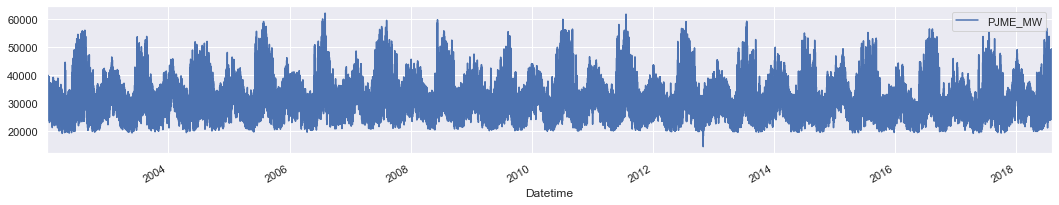

In [304]:
fig, ax = plt.subplots(1, 1, figsize=(18, 3))

ds = pd.read_csv("PJME_hourly.csv", index_col=0, parse_dates=[0])
ds.plot(ax=ax)

In [284]:
# Inserte su código aquí

ds = pd.read_csv("PJME_hourly.csv", index_col=0, parse_dates=[0])

# se crea una nueva columna con la categoría del día
f = lambda dw: "dia trabajo" if dw < 5 else "fin de semana"
ds["tipo_dia"] = list(map(f, ds.index.dayofweek))

# se agrupa por esta categoría y se calcula la mediana de los valores de consumo
ds.groupby("tipo_dia").apply(np.median)

tipo_dia
dia trabajo      32257.0
fin de semana    28864.0
dtype: float64

## Ejercicio 10

Se requiere hacer una comparación del coportamiento del consumo energético por año (2002 - 2018). Se mostrará en forma de un tabla los valores medios de consumo, valores máximos y mínimos.  La ciudad espera que durante este lapso de tiempo, el consumo energético decreció debido a las múltiples medidas tomadas. ¿Se puede decir que el consumo energético promedio ha decrecido en estos años?

Ayuda: puede usar la función `agg()`

In [307]:
# Inserte su código aquí

ds = pd.read_csv("PJME_hourly.csv", index_col=0, parse_dates=[0])

# se crea una nueva columna anio
ds["anio"] = ds.index.year

# se calculan los valores, luego de haberlos agrupado
ds.groupby("anio").agg(["mean", "max", "min"])

PJME_MW                  
              mean      max      min
anio                                
2002  31565.617106  55934.0  19247.0
2003  31698.758621  53737.0  19414.0
2004  32270.434867  51962.0  19543.0
2005  33310.478648  59031.0  19825.0
2006  32409.269696  62009.0  19690.0
2007  33613.468600  59437.0  20761.0
2008  32929.593373  59655.0  20553.0
2009  31851.533683  55433.0  20207.0
2010  33101.172662  59807.0  20020.0
2011  32368.308518  61646.0  20122.0
2012  31440.107265  58999.0  14544.0
2013  31706.525120  59122.0  19622.0
2014  31496.406963  54945.0  19623.0
2015  31709.394178  55129.0  19450.0
2016  31337.833106  56391.0  19524.0
2017  30650.911644  55218.0  19255.0
2018  31782.598715  56609.0  19937.0